In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"

data = np.genfromtxt("Data/housing.csv", delimiter=",", skip_header=1)[:, :-1]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)
y_train_raw = y_train_raw.reshape(-1, 1)
y_test_raw = y_test_raw.reshape(-1, 1)

scaler1 = StandardScaler()
scaler_x = scaler1.fit(X_train_raw)
X_train = scaler_x.transform(X_train_raw)
X_test = scaler_x.transform(X_test_raw)

scaler2 = StandardScaler()
scaler_y = scaler2.fit(y_train_raw)
y_train = scaler_y.transform(y_train_raw)
y_test = scaler_y.transform(y_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32, device=device).to(device=device)
y_train = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1).to(device=device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device=device)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device=device)

In [2]:
activation_lst = [nn.Sigmoid(), nn.ReLU(), nn.Tanh()]

def model_activations(activation):
    model = nn.Sequential(
        nn.Linear(8, 100),
        activation,
        nn.Linear(100, 50),
        activation,
        nn.Linear(50, 10),
        activation,
        nn.Linear(10, 1))
    model.to(device=device)
    return model

# Dropout does not work for this model... We have a very small model!

In [3]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

def train_model(model):
    loss_fn = nn.MSELoss().to(device=device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=50, shuffle=True)
    n_epochs = 30

    best_mse = np.inf
    loss_values = []
    for epoch in range(n_epochs):
        running_loss = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            model.eval()
            mse = float(loss)
            running_loss += mse
            if mse < best_mse:
                best_mse = mse
        loss_values.append(running_loss/len(train_loader))
        print(f'Finished epoch {epoch}, latest loss {loss}')
        print("Best MSE:", best_mse)
        
        # y_pred = model(scaler_x.inverse_transform(X_test))
        # acc = (y_pred.round() == scaler_y.inverse_transform(y_test)).float().mean()
        # acc = float(acc)
        # print(f"End of {epoch}, accuracy {acc}")
    plt.plot(loss_values)
    plt.show()


Sigmoid()
Finished epoch 0, latest loss 0.945248007774353
Best MSE: 0.23235876858234406
Finished epoch 1, latest loss 0.4299975335597992
Best MSE: 0.15975472331047058
Finished epoch 2, latest loss 0.1389738768339157
Best MSE: 0.1389738768339157
Finished epoch 3, latest loss 0.2294655740261078
Best MSE: 0.13223187625408173
Finished epoch 4, latest loss 0.09553883969783783
Best MSE: 0.09553883969783783
Finished epoch 5, latest loss 0.3131263256072998
Best MSE: 0.09553883969783783
Finished epoch 6, latest loss 0.10158014297485352
Best MSE: 0.09553883969783783
Finished epoch 7, latest loss 0.06276671588420868
Best MSE: 0.06276671588420868
Finished epoch 8, latest loss 0.1743849217891693
Best MSE: 0.06276671588420868
Finished epoch 9, latest loss 0.8283266425132751
Best MSE: 0.06276671588420868
Finished epoch 10, latest loss 0.13406160473823547
Best MSE: 0.06276671588420868
Finished epoch 11, latest loss 0.10212717950344086
Best MSE: 0.06276671588420868
Finished epoch 12, latest loss 0.1114

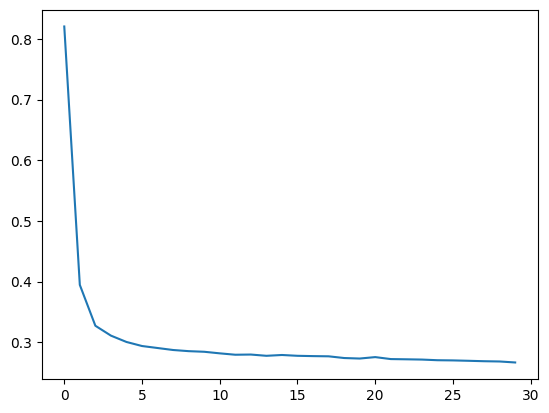

None
ReLU()
Finished epoch 0, latest loss 0.6194896101951599
Best MSE: 0.13510861992835999
Finished epoch 1, latest loss 0.3827819228172302
Best MSE: 0.1039915606379509
Finished epoch 2, latest loss 0.05854878947138786
Best MSE: 0.05854878947138786
Finished epoch 3, latest loss 0.6519436240196228
Best MSE: 0.05854878947138786
Finished epoch 4, latest loss 0.3220781087875366
Best MSE: 0.05854878947138786
Finished epoch 5, latest loss 0.4502294957637787
Best MSE: 0.05854878947138786
Finished epoch 6, latest loss 0.20625409483909607
Best MSE: 0.05854878947138786
Finished epoch 7, latest loss 0.33985090255737305
Best MSE: 0.05854878947138786
Finished epoch 8, latest loss 0.10450708866119385
Best MSE: 0.05854878947138786
Finished epoch 9, latest loss 0.14468835294246674
Best MSE: 0.05854878947138786
Finished epoch 10, latest loss 0.19002246856689453
Best MSE: 0.05854878947138786
Finished epoch 11, latest loss 0.10875897854566574
Best MSE: 0.05854878947138786
Finished epoch 12, latest loss 0

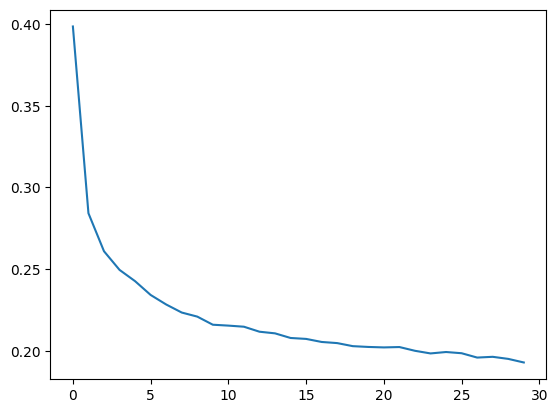

None
Tanh()
Finished epoch 0, latest loss 0.1940631866455078
Best MSE: 0.11046136915683746
Finished epoch 1, latest loss 0.1710023581981659
Best MSE: 0.10872893780469894
Finished epoch 2, latest loss 0.2621318995952606
Best MSE: 0.09330403804779053
Finished epoch 3, latest loss 0.17096984386444092
Best MSE: 0.09330403804779053
Finished epoch 4, latest loss 0.19310149550437927
Best MSE: 0.09330403804779053
Finished epoch 5, latest loss 0.42778897285461426
Best MSE: 0.09330403804779053
Finished epoch 6, latest loss 0.41801154613494873
Best MSE: 0.07528482377529144
Finished epoch 7, latest loss 0.09879857301712036
Best MSE: 0.06804202497005463
Finished epoch 8, latest loss 0.30410927534103394
Best MSE: 0.06804202497005463
Finished epoch 9, latest loss 0.09197099506855011
Best MSE: 0.06804202497005463
Finished epoch 10, latest loss 0.052846089005470276
Best MSE: 0.052846089005470276
Finished epoch 11, latest loss 0.16732917726039886
Best MSE: 0.052846089005470276
Finished epoch 12, latest 

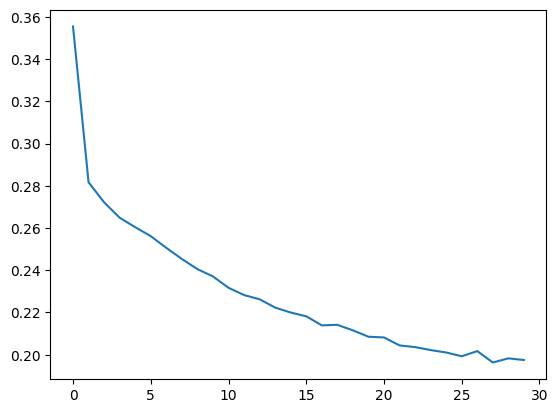

None


In [4]:
for activation in activation_lst:
    print(activation)
    print(train_model(model_activations(activation)))

Sigmoid()
Finished epoch 0, latest loss 0.13795322179794312
Best MSE: 0.13795322179794312
Finished epoch 1, latest loss 0.7518755197525024
Best MSE: 0.12832540273666382
Finished epoch 2, latest loss 0.11521641910076141
Best MSE: 0.11521641910076141
Finished epoch 3, latest loss 0.33980709314346313
Best MSE: 0.1058102548122406
Finished epoch 4, latest loss 0.1298181414604187
Best MSE: 0.1021786481142044
Finished epoch 5, latest loss 0.4466467499732971
Best MSE: 0.1021786481142044
Finished epoch 6, latest loss 0.41608166694641113
Best MSE: 0.1021786481142044
Finished epoch 7, latest loss 0.1991652250289917
Best MSE: 0.1021786481142044
Finished epoch 8, latest loss 0.13671182096004486
Best MSE: 0.1021786481142044
Finished epoch 9, latest loss 0.6623662710189819
Best MSE: 0.1021786481142044
Finished epoch 10, latest loss 0.1657448709011078
Best MSE: 0.08612383902072906
Finished epoch 11, latest loss 0.355759859085083
Best MSE: 0.08377548307180405
Finished epoch 12, latest loss 0.2573141753

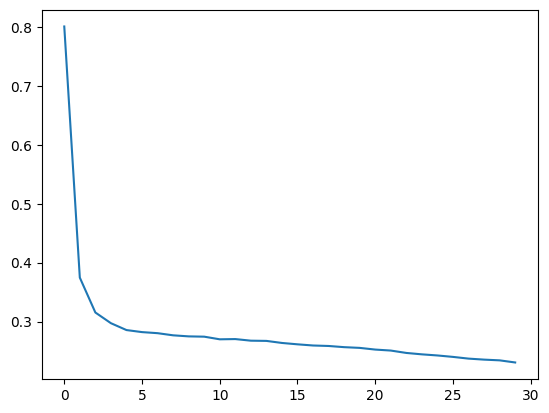

None
ReLU()
Finished epoch 0, latest loss 0.8087356090545654
Best MSE: 0.13096711039543152
Finished epoch 1, latest loss 0.3910512924194336
Best MSE: 0.08886633068323135
Finished epoch 2, latest loss 0.21261188387870789
Best MSE: 0.08886633068323135
Finished epoch 3, latest loss 0.24977120757102966
Best MSE: 0.08886633068323135
Finished epoch 4, latest loss 0.11795082688331604
Best MSE: 0.08071392774581909
Finished epoch 5, latest loss 0.07174297422170639
Best MSE: 0.07174297422170639
Finished epoch 6, latest loss 0.1333082914352417
Best MSE: 0.06766000390052795
Finished epoch 7, latest loss 0.03804660961031914
Best MSE: 0.03804660961031914
Finished epoch 8, latest loss 0.179704487323761
Best MSE: 0.03804660961031914
Finished epoch 9, latest loss 0.3172871470451355
Best MSE: 0.03804660961031914
Finished epoch 10, latest loss 0.215668186545372
Best MSE: 0.03804660961031914
Finished epoch 11, latest loss 0.4763907194137573
Best MSE: 0.03804660961031914
Finished epoch 12, latest loss 0.10

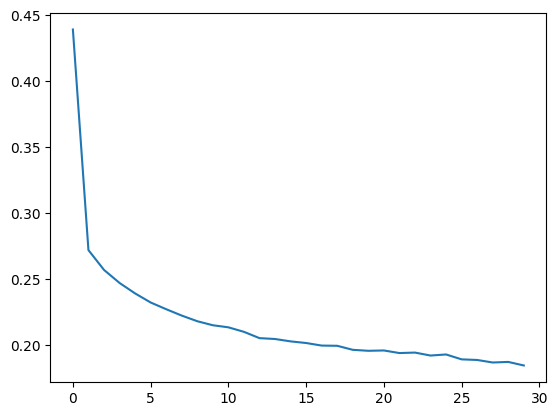

None
Tanh()
Finished epoch 0, latest loss 0.19517628848552704
Best MSE: 0.13879035413265228
Finished epoch 1, latest loss 0.3468732237815857
Best MSE: 0.07600116729736328
Finished epoch 2, latest loss 0.26025155186653137
Best MSE: 0.07600116729736328
Finished epoch 3, latest loss 1.2548738718032837
Best MSE: 0.07600116729736328
Finished epoch 4, latest loss 0.30096399784088135
Best MSE: 0.07600116729736328
Finished epoch 5, latest loss 0.1658499389886856
Best MSE: 0.06636231392621994
Finished epoch 6, latest loss 0.400309681892395
Best MSE: 0.06636231392621994
Finished epoch 7, latest loss 0.08763866871595383
Best MSE: 0.06636231392621994
Finished epoch 8, latest loss 0.3846382796764374
Best MSE: 0.06636231392621994
Finished epoch 9, latest loss 0.251882940530777
Best MSE: 0.06636231392621994
Finished epoch 10, latest loss 0.21258561313152313
Best MSE: 0.06636231392621994
Finished epoch 11, latest loss 0.2708169221878052
Best MSE: 0.06214745342731476
Finished epoch 12, latest loss 0.11

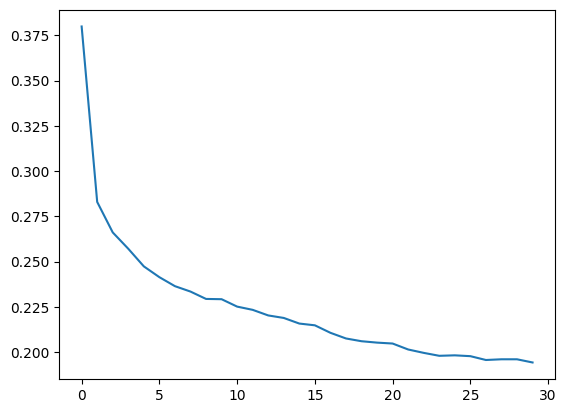

None


In [5]:
def model_batch(activation):
      model_batch = nn.Sequential(
            nn.Linear(8, 100),
            nn.BatchNorm1d(100), 
            activation,
            nn.Linear(100, 50),
            nn.BatchNorm1d(50), 
            activation,
            nn.Linear(50, 10),
            nn.BatchNorm1d(10), 
            activation,
            nn.Linear(10, 1))
      model_batch.to(device=device)
      return model_batch

for activation in activation_lst:
      print(activation)
      print(train_model(model_batch(activation)))